In [10]:
pip install pandas numpy matplotlib seaborn scikit-learn lightgbm jupyter

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas in d:\anaconda\lib\site-packages (2.2.3)



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style("whitegrid")
print("Libraries imported successfully!")

Libraries imported successfully!


## Data Loading and Cleaning
We load the `dataset.csv` file and perform essential cleaning steps, such as dropping unnecessary columns, handling missing values, and removing duplicate entries to ensure the data quality for our analysis.

In [16]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# --- Part 1: Descriptive and Exploratory Data Analysis (EDA) ---
print("--- Part 1: Descriptive and Exploratory Data Analysis (EDA) ---")

# Data Overview & Cleaning
print("\n1.1 Data Overview & Cleaning")
# Drop the unnecessary first column and any duplicates
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

print(f"\nShape of the dataset after cleaning: {df.shape}")
print("Data head:")
df.head()

--- Part 1: Descriptive and Exploratory Data Analysis (EDA) ---

1.1 Data Overview & Cleaning

Shape of the dataset after cleaning: (113549, 20)
Data head:


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# Part 1: Exploratory Data Analysis (EDA) 🕵️‍♀️
In this section, we'll explore the dataset to understand its underlying patterns and characteristics. We will analyze feature distributions, identify top artists and genres, and uncover relationships between different audio features.

### 1.1 Descriptive Statistics
We'll start by generating descriptive statistics for the numerical columns to get a high-level overview of the data's central tendency, dispersion, and shape of the distribution.

In [10]:
# Descriptive Statistics for Audio Features
print("\n1.2 Descriptive Statistics for Audio Features:")
df[['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].describe()


1.2 Descriptive Statistics for Audio Features:


,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,0.567031,0.642091,-8.243408,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745
std,22.283855,0.173409,0.251053,5.011422,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954
min,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.456000,0.473000,-9.998000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000
50%,35.000000,0.580000,0.685000,-6.997000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000
75%,50.000000,0.695000,0.854000,-5.001000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000
max,100.000000,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


### 1.2 Genre-Specific Analysis of Key Feature Distributions
Instead of looking at overall distributions, it's more insightful to compare them across different genres. The following box plots show how features like **danceability, energy, valence (positivity), and acousticness** vary significantly from one genre to another, revealing their unique sonic profiles.


1.3 Analyzing Distributions of Key Features Across Genres...


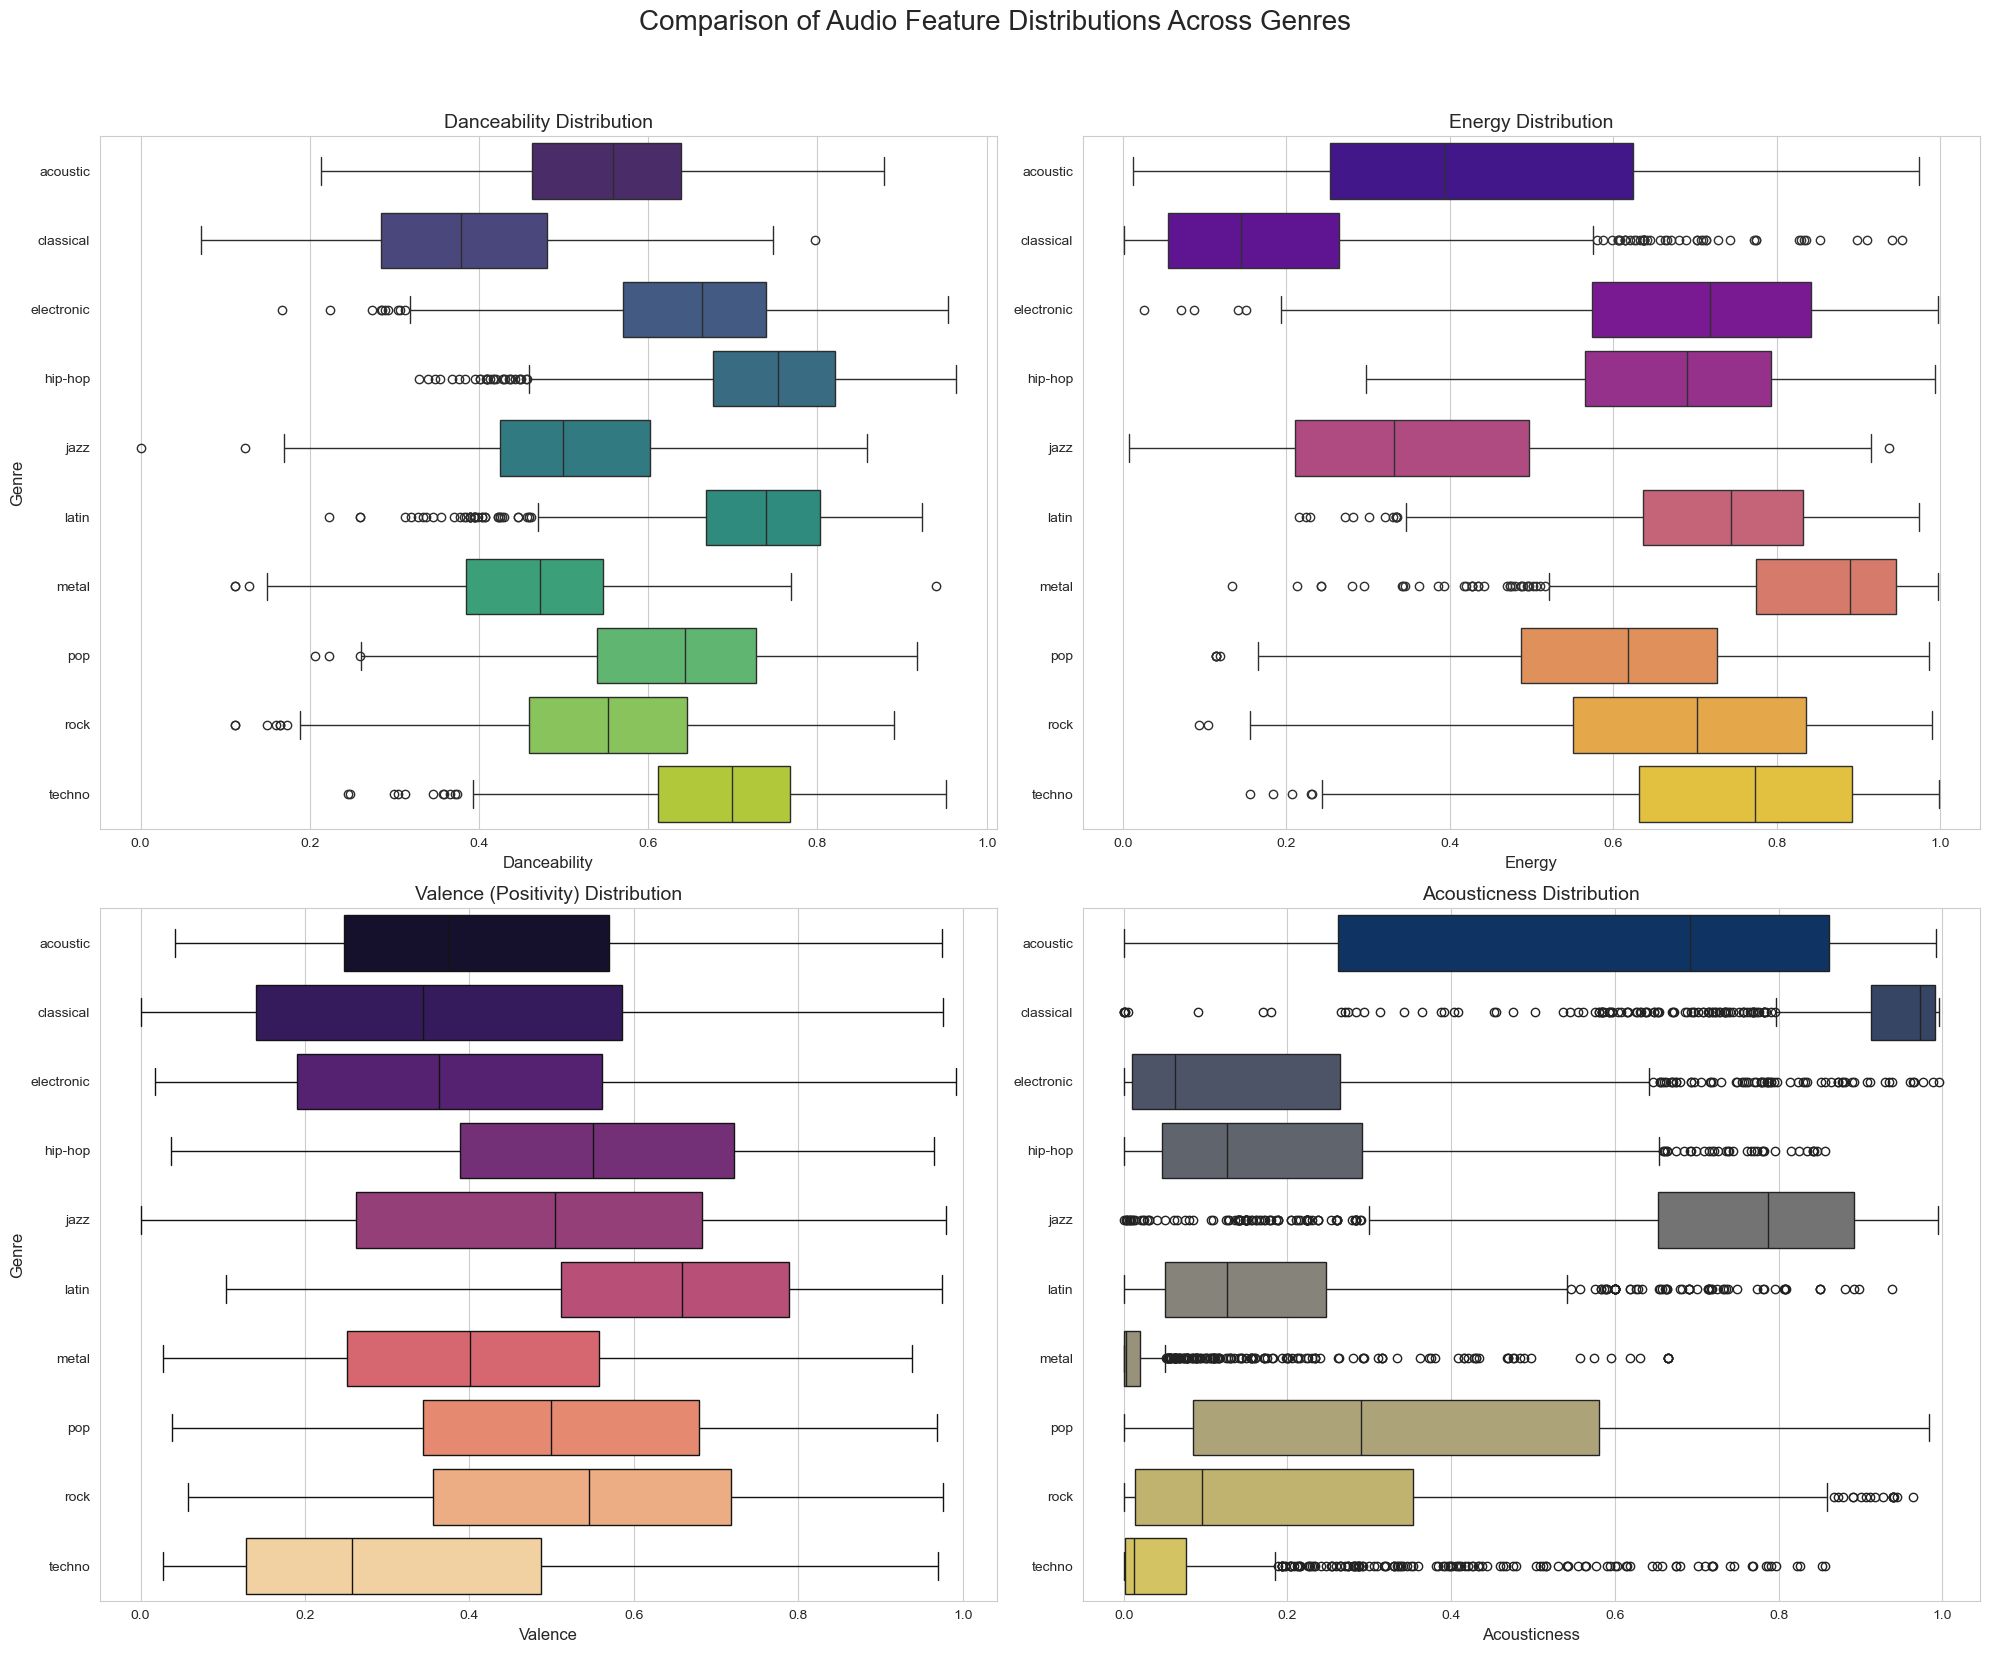

In [17]:
# 1.3: Genre-Specific Analysis of Key Feature Distributions

print("\n1.3 Analyzing Distributions of Key Features Across Genres...")

# Select a diverse subset of genres for clear analysis
selected_genres = [
    'pop', 'rock', 'hip-hop', 'latin', 'classical',
    'jazz', 'electronic', 'acoustic', 'metal', 'techno'
]
df_genres = df[df['track_genre'].isin(selected_genres)]

# Create subplots to visualize multiple features
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Comparison of Audio Feature Distributions Across Genres', fontsize=20, y=1.03)

# Plot 1: Danceability
sns.boxplot(ax=axes[0, 0], data=df_genres, x='danceability', y='track_genre', palette='viridis')
axes[0, 0].set_title('Danceability Distribution', fontsize=14)
axes[0, 0].set_xlabel('Danceability', fontsize=12)
axes[0, 0].set_ylabel('Genre', fontsize=12)

# Plot 2: Energy
sns.boxplot(ax=axes[0, 1], data=df_genres, x='energy', y='track_genre', palette='plasma')
axes[0, 1].set_title('Energy Distribution', fontsize=14)
axes[0, 1].set_xlabel('Energy', fontsize=12)
axes[0, 1].set_ylabel('') # Hide redundant y-axis label

# Plot 3: Valence (Musical Positivity)
sns.boxplot(ax=axes[1, 0], data=df_genres, x='valence', y='track_genre', palette='magma')
axes[1, 0].set_title('Valence (Positivity) Distribution', fontsize=14)
axes[1, 0].set_xlabel('Valence', fontsize=12)
axes[1, 0].set_ylabel('Genre', fontsize=12)

# Plot 4: Acousticness
sns.boxplot(ax=axes[1, 1], data=df_genres, x='acousticness', y='track_genre', palette='cividis')
axes[1, 1].set_title('Acousticness Distribution', fontsize=14)
axes[1, 1].set_xlabel('Acousticness', fontsize=12)
axes[1, 1].set_ylabel('') # Hide redundant y-axis label

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


1.3 Plotting Distributions of Key Features...


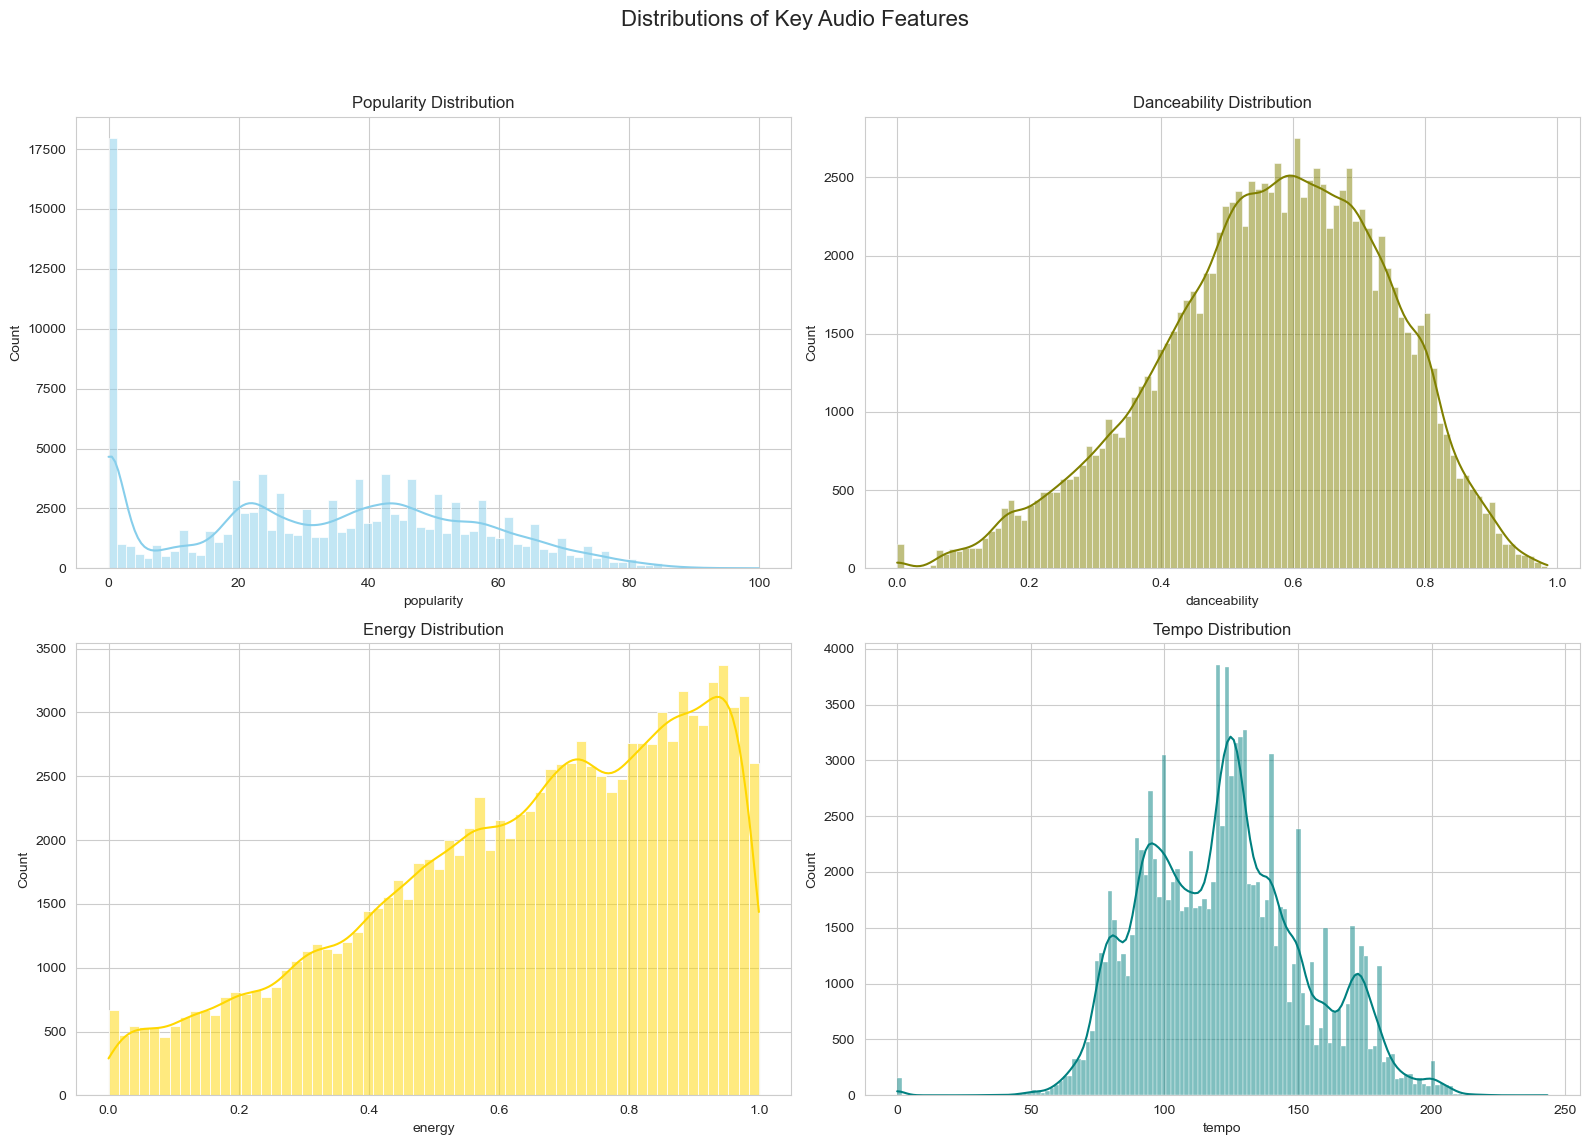

In [11]:
# Distributions of Key Features
print("\n1.3 Plotting Distributions of Key Features...")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distributions of Key Audio Features', fontsize=16)

sns.histplot(df['popularity'], kde=True, ax=axes[0, 0], color='skyblue').set_title('Popularity Distribution')
sns.histplot(df['danceability'], kde=True, ax=axes[0, 1], color='olive').set_title('Danceability Distribution')
sns.histplot(df['energy'], kde=True, ax=axes[1, 0], color='gold').set_title('Energy Distribution')
sns.histplot(df['tempo'], kde=True, ax=axes[1, 1], color='teal').set_title('Tempo Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
# 1.4 Popularity Analysis
print("\n1.4 Popularity Analysis")
# Top 10 Most Popular Tracks
top_10_tracks = df.groupby('track_name')['popularity'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Most Popular Tracks:")
print(top_10_tracks)

# Top 10 Most Popular Artists
top_10_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
print("\n\nTop 10 Most Popular Artists:")
print(top_10_artists)


1.4 Popularity Analysis

Top 10 Most Popular Tracks:
track_name
Unholy (feat. Kim Petras)                100.0
Quevedo: Bzrp Music Sessions, Vol. 52     99.0
La Bachata                                98.0
Me Porto Bonito                           97.0
Tití Me Preguntó                          97.0
Efecto                                    95.5
Ojitos Lindos                             94.5
Moscow Mule                               94.0
Neverita                                  93.0
CUFF IT                                   93.0
Name: popularity, dtype: float64


Top 10 Most Popular Artists:
artists
Sam Smith;Kim Petras           100.0
Bizarrap;Quevedo                99.0
Manuel Turizo                   98.0
Bad Bunny;Chencho Corleone      97.0
Bad Bunny;Bomba Estéreo         94.5
Joji                            94.0
Beyoncé                         93.0
Harry Styles                    92.0
Rema;Selena Gomez               92.0
Rauw Alejandro;Lyanno;Brray     91.0
Name: popularity, dtype

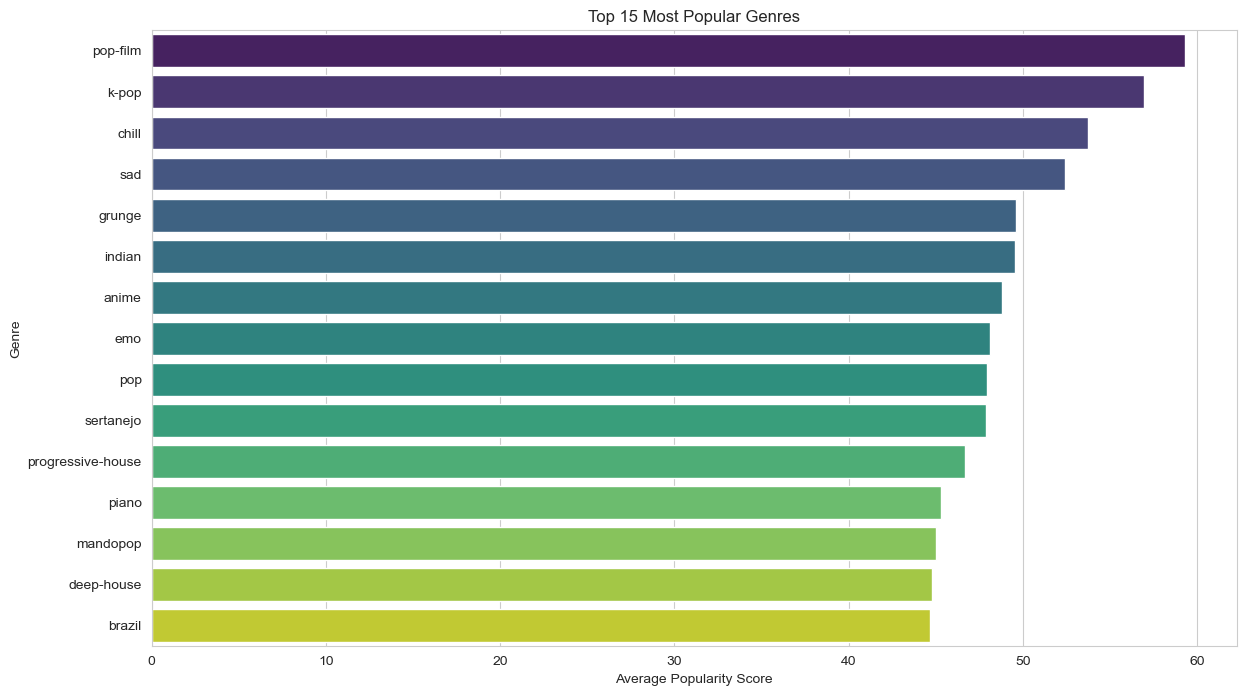

In [20]:
# Average Popularity by Genre
avg_pop_genre = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
sns.barplot(x=avg_pop_genre.values, y=avg_pop_genre.index, palette='viridis')
plt.title('Top 15 Most Popular Genres')
plt.xlabel('Average Popularity Score')
plt.ylabel('Genre')
plt.show()

### Correlation Analysis
A correlation heatmap is a powerful tool to visualize the relationships between all numerical features. We'll use it to identify which audio features are most strongly correlated with **popularity**.


1.5 Correlation Analysis


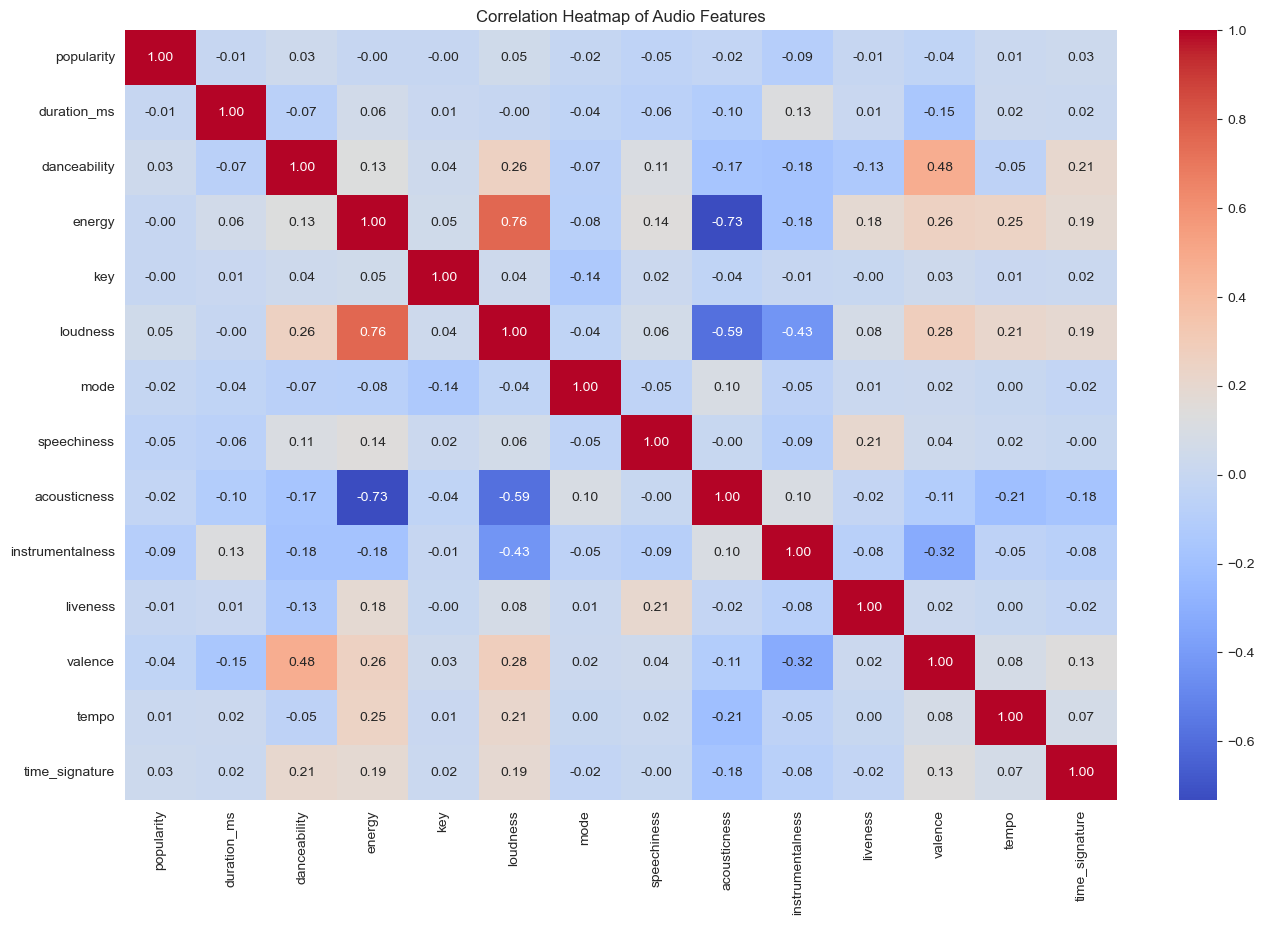

In [21]:
# 1.5 Correlation Analysis
print("\n1.5 Correlation Analysis")
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Audio Features')
plt.show()


1.6 Feature Comparison Across Genres


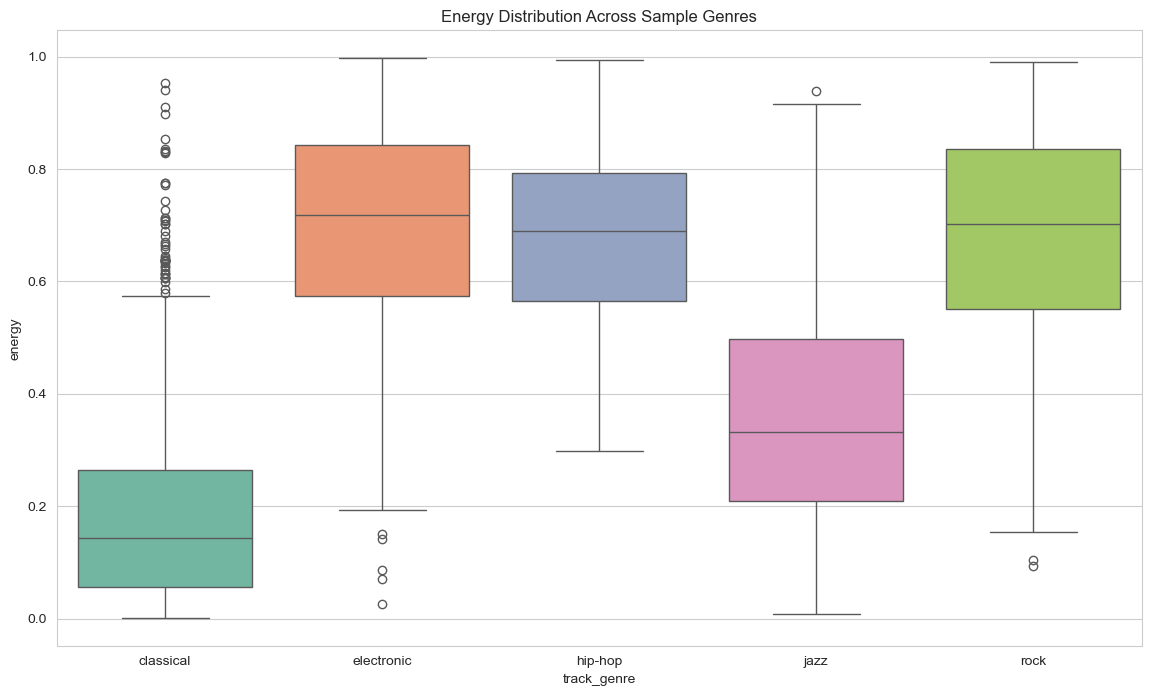

In [15]:
# 1.6 Feature Comparison Across Genres
print("\n1.6 Feature Comparison Across Genres")
sample_genres = ['rock', 'jazz', 'hip-hop', 'classical', 'electronic']
df_sample_genres = df[df['track_genre'].isin(sample_genres)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_sample_genres, x='track_genre', y='energy', palette='Set2')
plt.title('Energy Distribution Across Sample Genres')
plt.show()

In [22]:
# --- Part 2: Predictive Modeling ---
print("\n--- Part 2: Predictive Modeling ---")

# Define features (X) and targets (y)
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[audio_features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Features selected and scaled.")


--- Part 2: Predictive Modeling ---
Features selected and scaled.


In [23]:
# 2.1 Objective 1: Predicting Song Popularity (Regression)
print("\n2.1 Predicting Song Popularity (Regression)")
y_popularity = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_popularity, test_size=0.2, random_state=42)

# Models
models_reg = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "LightGBM Regressor": lgb.LGBMRegressor(random_state=42)
}

# Train and evaluate
for name, model in models_reg.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"Results for {name}:")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")


2.1 Predicting Song Popularity (Regression)

Training Linear Regression...
Results for Linear Regression:
  Root Mean Squared Error (RMSE): 22.1206
  R-squared (R²): 0.0245

Training Random Forest Regressor...
Results for Random Forest Regressor:
  Root Mean Squared Error (RMSE): 15.3018
  R-squared (R²): 0.5332

Training LightGBM Regressor...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2311
[LightGBM] [Info] Number of data points in the train set: 90839, number of used features: 11
[LightGBM] [Info] Start training from score 33.339821
Results for LightGBM Regressor:
  Root Mean Squared Error (RMSE): 20.5427
  R-squared (R²): 0.1587


In [24]:
# 2.2 Objective 2: Classifying Song Genre (Classification)
print("\n2.2 Classifying Song Genre (Classification)")

# Using a subset of top 5 genres for a clearer classification report
top_5_genres = df['track_genre'].value_counts().nlargest(5).index
df_top5 = df[df['track_genre'].isin(top_5_genres)]

X_genre = df_top5[audio_features]
y_genre = df_top5['track_genre']

# Preprocessing
X_genre_scaled = scaler.fit_transform(X_genre)
le = LabelEncoder()
y_genre_encoded = le.fit_transform(y_genre)
X_train, X_test, y_train, y_test = train_test_split(X_genre_scaled, y_genre_encoded, test_size=0.3, random_state=42, stratify=y_genre_encoded)

# Model
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nResults for Random Forest Classifier:")
print(f"  Accuracy: {accuracy:.4f}")
print("  Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


2.2 Classifying Song Genre (Classification)

Training Random Forest Classifier...

Results for Random Forest Classifier:
  Accuracy: 0.6153
  Classification Report:
              precision    recall  f1-score   support

    acoustic       0.62      0.65      0.63       300
     british       0.57      0.55      0.56       300
  electronic       0.64      0.64      0.64       300
         emo       0.57      0.55      0.56       300
        funk       0.68      0.69      0.68       300

    accuracy                           0.62      1500
   macro avg       0.61      0.62      0.61      1500
weighted avg       0.61      0.62      0.61      1500




--- Part 3: Unsupervised Learning - Clustering ---
Finding optimal number of clusters using the Elbow Method...


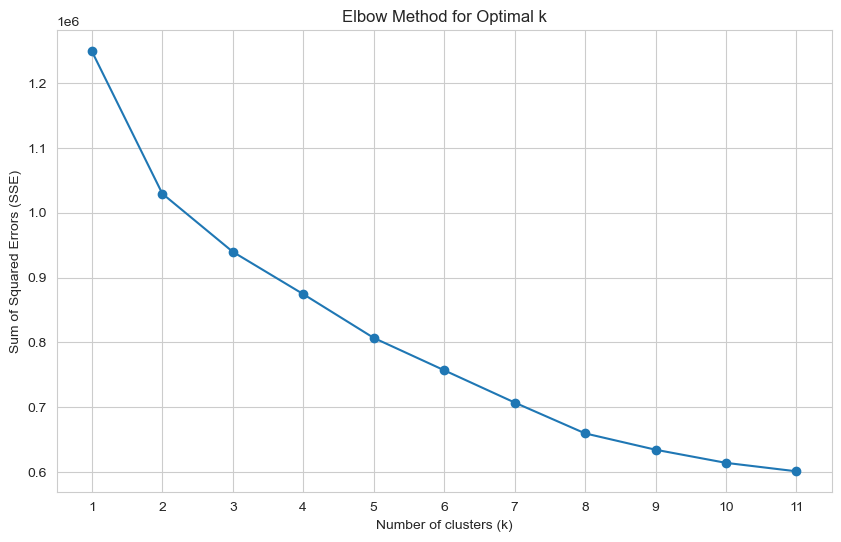

In [25]:
# --- Part 3: Unsupervised Learning - Clustering ---
print("\n--- Part 3: Unsupervised Learning - Clustering ---")
print("Finding optimal number of clusters using the Elbow Method...")

# Determine optimal number of clusters
# Note: This cell might take a minute or two to run
sse = []
k_range = range(1, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_range)
plt.show()

Reducing dimensionality with PCA...
Applying K-Means with k=5...


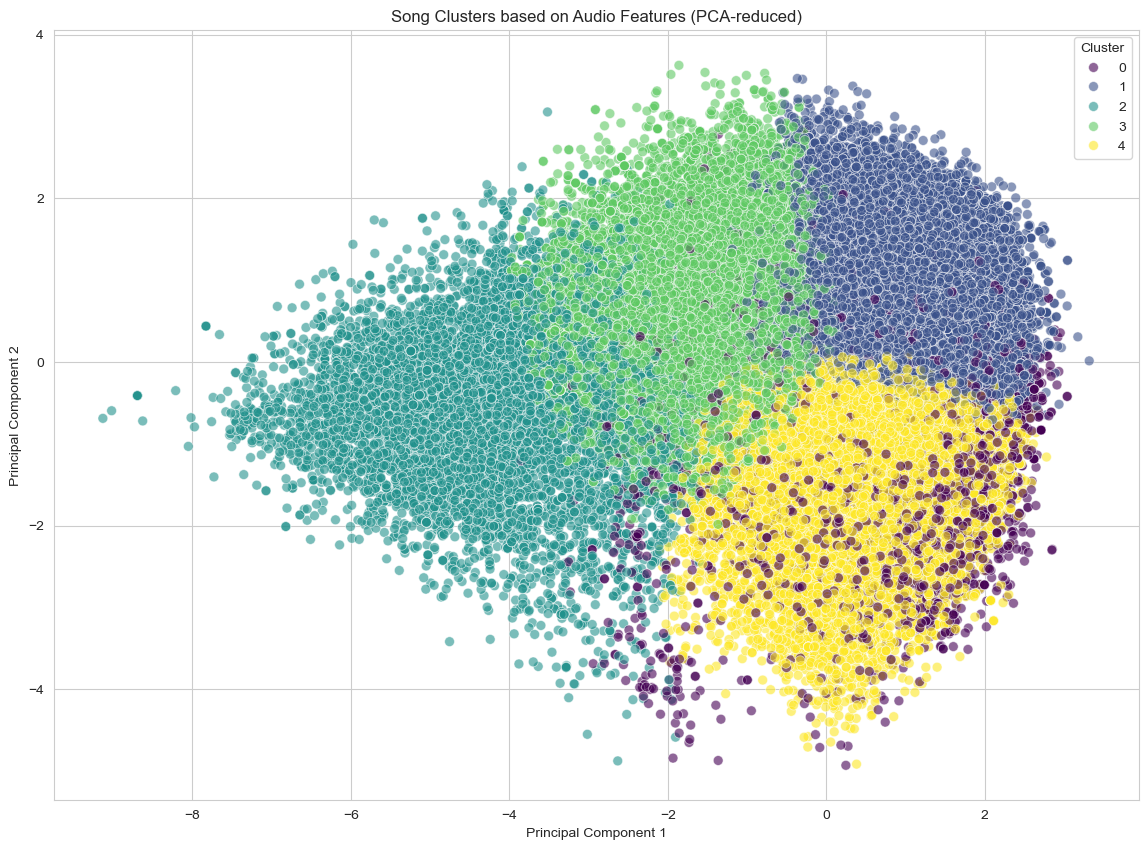


Project Complete!🚀


In [26]:
# Reduce dimensionality for visualization
print("Reducing dimensionality with PCA...")
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means with the chosen k (e.g., k=5 from the elbow plot)
k = 5
print(f"Applying K-Means with k={k}...")
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.6, s=50)
plt.title('Song Clusters based on Audio Features (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

print("\nProject Complete!🚀")